In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

# Create a 2D dataset with clusters + outliers
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=42)

In [2]:
# Add some outliers manually
rng = np.random.RandomState(42)
outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.concatenate([X, outliers], axis=0)

In [3]:
k = 5  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X)

NearestNeighbors()

In [4]:
# Find distances to k nearest neighbors
distances, indices = nbrs.kneighbors(X)

In [5]:
# Use the distance to the k-th nearest neighbor as outlier score
knn_scores = distances[:, -1]

# Larger distance → more likely an outlier
threshold = np.percentile(knn_scores, 95)  # Top 5% considered as outliers
outlier_flags = knn_scores > threshold

print(f"Threshold distance: {threshold:.2f}")
print(f"Number of outliers detected: {outlier_flags.sum()}")

Threshold distance: 2.82
Number of outliers detected: 15


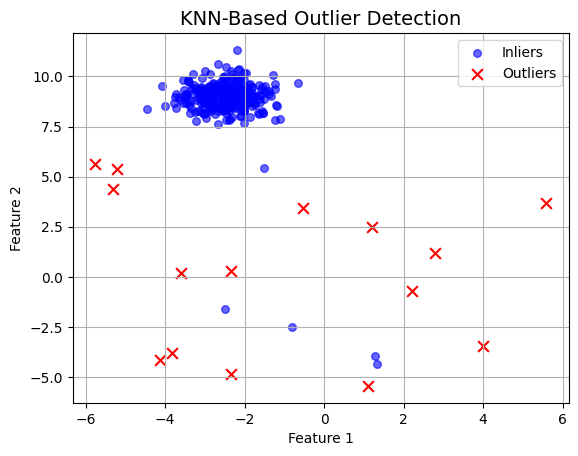

In [6]:
# Normal points
plt.scatter(X[~outlier_flags, 0], X[~outlier_flags, 1],
            color='blue', label='Inliers', s=30, alpha=0.6)

# Outliers
plt.scatter(X[outlier_flags, 0], X[outlier_flags, 1],
            color='red', label='Outliers', s=60, marker='x')

# Draw threshold boundary (optional visualization)
plt.title("KNN-Based Outlier Detection", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()